# Protein Veri Seti

## 1) Verinin Keşfi (EDA)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
protein = pd.read_csv("pdb_data_no_dups.csv")

* **Veri seti Proteinlerin yapısal dizinleri ile alakalidir.**

* **Veriler Protein Data Bank alinmistir.**

* **Yapisal biyologlar atomlarin molekuldeki yerlerini belirlemek icin "X-ray crystallography, NMR spectroscopy, and cryo-electron microscopy" bu uc yontemi kullanmistir ki bu yontemler bizim  degiskenlerimizin icerisinde barinmaktadir.**

* **structureId:** Yapisal ID.
* **classification:** Belirtilen kumeler, siniflar .
* **experimentalTechnique:** Arastirmada kullanilan teknikler, yontemler.
* **macromolecule Type:** Makromolekül Tipi. 
* **residueCount:** Tortu Sayisi.
* **resolution:** Bir bileşiğin, kendisini oluşturan unsurlara ayrılması; erime; çözünme; ayrışma.
* **structureMolecularWeight:** Yapinin molekul agirligidir.
* **crystallizationMethod:** Kristallestirme icin kullanilan metod. 
* **crystallizationTempK:** Kristallestirme sicakligi Kelvin cinsinden.
* **densityMatthews:** Kristale ait yogunluk.
* **densityPercentSol:** Yogunluk yuzdesi.
* **pdbxDetails:** pH degerine ait detaylar.
* **phValue:** pH degeri 
* **publicationYear:** Verinin yayinlanma yili.

In [4]:
df = protein.copy()
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
structureId                 141401 non-null object
classification              141399 non-null object
experimentalTechnique       141401 non-null object
macromoleculeType           137636 non-null object
residueCount                141401 non-null int64
resolution                  128589 non-null float64
structureMolecularWeight    141401 non-null float64
crystallizationMethod       96242 non-null object
crystallizationTempK        97039 non-null float64
densityMatthews             124724 non-null float64
densityPercentSol           124749 non-null float64
pdbxDetails                 118534 non-null object
phValue                     105110 non-null float64
publicationYear             117602 non-null float64
dtypes: float64(7), int64(1), object(6)
memory usage: 15.1+ MB


In [6]:
df.dtypes

structureId                  object
classification               object
experimentalTechnique        object
macromoleculeType            object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
publicationYear             float64
dtype: object

In [7]:
df.isnull().sum()

structureId                     0
classification                  2
experimentalTechnique           0
macromoleculeType            3765
residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationMethod       45159
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
pdbxDetails                 22867
phValue                     36291
publicationYear             23799
dtype: int64

In [8]:
df.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

### 1.1) Kategorik Değişkenler

In [9]:
dfkat = df.select_dtypes(include = ["object"])
dfkat

,structureId,classification,experimentalTechnique,macromoleculeType,crystallizationMethod,pdbxDetails
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,"VAPOR DIFFUSION, HANGING DROP","pH 7.00, VAPOR DIFFUSION, HANGING DROP"
1,101D,DNA,X-RAY DIFFRACTION,DNA,NaN,NaN
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,NaN,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ..."
3,102D,DNA,X-RAY DIFFRACTION,DNA,"VAPOR DIFFUSION, SITTING DROP","pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper..."
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,NaN,NaN
...,...,...,...,...,...,...
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,NaN,NaN
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,NaN,NaN
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,NaN,NaN
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,NaN,NaN


In [10]:
dfkat.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'crystallizationMethod', 'pdbxDetails'],
      dtype='object')

In [11]:
dfkat["structureId"].value_counts()

3NO0    4
1UJQ    4
2FYM    4
1Q8I    3
1NM8    3
       ..
3UO5    1
3OH4    1
5UCF    1
4DY9    1
2Q29    1
Name: structureId, Length: 140911, dtype: int64

In [19]:
dfkat["classification"].value_counts()

HYDROLASE                                  20915
TRANSFERASE                                15777
OXIDOREDUCTASE                             12494
LYASE                                       4329
IMMUNE SYSTEM                               4075
                                           ...  
splicing/DNA/RNA                               1
ANTIMICROBIAL PROTEIN, MEMBRANE PROTEIN        1
SIGNALLING PROTEIN/KINASE                      1
HORMONE(MUSCLE RELAXANT)                       1
Hydrolase/calcium binding protein              1
Name: classification, Length: 5050, dtype: int64

In [14]:
dfkat["experimentalTechnique"].value_counts()

X-RAY DIFFRACTION                                            126432
SOLUTION NMR                                                  12268
ELECTRON MICROSCOPY                                            2252
SOLID-STATE NMR                                                  99
ELECTRON CRYSTALLOGRAPHY                                         74
NEUTRON DIFFRACTION                                              60
FIBER DIFFRACTION                                                40
NEUTRON DIFFRACTION, X-RAY DIFFRACTION                           38
X-RAY DIFFRACTION, NEUTRON DIFFRACTION                           33
SOLUTION SCATTERING                                              32
POWDER DIFFRACTION                                               19
SOLUTION SCATTERING, SOLUTION NMR                                 9
SOLUTION NMR, SOLUTION SCATTERING                                 6
SOLID-STATE NMR, ELECTRON MICROSCOPY                              5
SOLUTION NMR, THEORETICAL MODEL                 

In [15]:
dfkat["macromoleculeType"].value_counts()

Protein                       127798
Protein#DNA                     4176
Protein#RNA                     2162
DNA                             1744
RNA                             1295
Protein#DNA#RNA                  250
DNA/RNA Hybrid                    58
DNA#RNA                           51
Protein#DNA#DNA/RNA Hybrid        34
RNA#DNA/RNA Hybrid                27
Protein#DNA/RNA Hybrid            19
DNA#DNA/RNA Hybrid                13
Protein#RNA#DNA/RNA Hybrid         9
Name: macromoleculeType, dtype: int64

In [16]:
dfkat["crystallizationMethod"].value_counts()

VAPOR DIFFUSION, HANGING DROP                 53870
VAPOR DIFFUSION, SITTING DROP                 30184
VAPOR DIFFUSION                                5780
EVAPORATION                                    1024
MICROBATCH                                     1019
                                              ...  
vapor diffusion, hanging drop, macroseeded        1
Microbatch (Paraffin oil)                         1
PEG 4000, T                                       1
small-scale batch                                 1
microdialysis or batch                            1
Name: crystallizationMethod, Length: 549, dtype: int64

In [17]:
dfkat["pdbxDetails"].value_counts()

pH 7.5                                                                                                                                                                               361
pH 6.5                                                                                                                                                                               342
0.1M bis-tris pH 7.0 -- 30% PEG3350                                                                                                                                                  297
VAPOR DIFFUSION, HANGING DROP                                                                                                                                                        249
28% PEG3350 -- 0.1M HEPES pH 7.0 -- 0.25M ammonium sulfate                                                                                                                           248
                                                                           

In [18]:
dfkat.isnull().sum()

structureId                  0
classification               2
experimentalTechnique        0
macromoleculeType         3765
crystallizationMethod    45159
pdbxDetails              22867
dtype: int64

In [35]:
def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son

In [37]:
eksik_deger_tablosu(dfkat)

,Eksik Değerler,% Değeri
structureId,0,0.000000
classification,2,0.001414
experimentalTechnique,0,0.000000
macromoleculeType,3765,2.662640
crystallizationMethod,45159,31.936832
pdbxDetails,22867,16.171739


In [19]:
dfkat.isin(["?", "-", ",", "*", "/"]).sum()

structureId              0
classification           0
experimentalTechnique    0
macromoleculeType        0
crystallizationMethod    0
pdbxDetails              0
dtype: int64

### 1.2) Sürekli Değişkenler

In [20]:
dfnum = df.select_dtypes(include = ["int64", "float64"])
dfnum

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
0,20,1.90,6360.30,NaN,1.78,30.89,7.0,1994.0
1,24,2.25,7939.35,NaN,2.00,38.45,NaN,1995.0
2,154,2.07,18112.80,NaN,3.09,60.20,9.0,1999.0
3,24,2.20,7637.17,277.0,2.28,46.06,7.0,1995.0
4,165,1.74,18926.61,NaN,2.75,55.28,NaN,1993.0
...,...,...,...,...,...,...,...,...
141396,932,2.60,101838.68,NaN,2.38,48.29,NaN,1991.0
141397,0,NaN,24244.34,NaN,3.17,61.18,NaN,1986.0
141398,342,1.80,34270.22,NaN,2.50,50.76,NaN,1990.0
141399,388,1.90,43542.29,NaN,2.79,55.93,NaN,1989.0


In [34]:
dfnum["phValue"].isnull().sum()

36291

In [21]:
dfnum.columns

Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'phValue', 'publicationYear'],
      dtype='object')

In [22]:
dfnum.describe().T

,count,mean,std,min,25%,50%,75%,max
residueCount,141401.0,825.374849,2136.461080,0.00,226.00,414.00,820.00,313236.0
resolution,128589.0,2.263807,1.410878,0.48,1.80,2.10,2.50,70.0
structureMolecularWeight,141401.0,112079.000614,569015.201457,314.38,26128.56,47477.79,94084.84,97730536.0
crystallizationTempK,97039.0,290.967713,9.541080,4.00,290.00,293.00,295.00,398.0
densityMatthews,124724.0,2.670267,0.783740,0.00,2.21,2.49,2.91,99.0
densityPercentSol,124749.0,51.353163,10.104561,0.00,44.37,50.50,57.71,92.0
phValue,105110.0,6.788685,2.556819,0.00,6.00,7.00,7.50,724.0
publicationYear,117602.0,2008.922365,8.459286,201.00,2005.00,2010.00,2014.00,2018.0


In [23]:
dfnum.count()

residueCount                141401
resolution                  128589
structureMolecularWeight    141401
crystallizationTempK         97039
densityMatthews             124724
densityPercentSol           124749
phValue                     105110
publicationYear             117602
dtype: int64

In [24]:
dfnum.isnull().sum()

residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
phValue                     36291
publicationYear             23799
dtype: int64

In [51]:
dfnum.isin(["?", "-", ",", "*", "/"]).sum()

residueCount                0
resolution                  0
structureMolecularWeight    0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
phValue                     0
publicationYear             0
dtype: int64

In [36]:
eksik_deger_tablosu(dfnum)

,Eksik Değerler,% Değeri
residueCount,0,0.000000
resolution,12812,9.060756
structureMolecularWeight,0,0.000000
crystallizationTempK,44362,31.373187
densityMatthews,16677,11.794117
densityPercentSol,16652,11.776437
phValue,36291,25.665306
publicationYear,23799,16.830857


**resolution**, **phValue**, **densityMatthews** üçünden biri target değişken olarak kullanılabilir.

# -------------------------------------

* Yayinlanma yili, int olarak gelmişti. datetime olarak değiştirdik.

In [57]:
df["publicationYear"] = df['publicationYear'].astype('datetime64[ns]')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
structureId                 141401 non-null object
classification              141399 non-null object
experimentalTechnique       141401 non-null object
macromoleculeType           137636 non-null object
residueCount                141401 non-null int64
resolution                  128589 non-null float64
structureMolecularWeight    141401 non-null float64
crystallizationMethod       96242 non-null object
crystallizationTempK        97039 non-null float64
densityMatthews             124724 non-null float64
densityPercentSol           124749 non-null float64
pdbxDetails                 118534 non-null object
phValue                     105110 non-null float64
publicationYear             117602 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 15.1+ MB


## 2) Verinin Görselleştirilmesi (Data visualization)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno

In [3]:
df1 = pd.read_csv("pdb_data_no_dups.csv")

* **Gorsellestirme yapilacagi zaman degiskenlerin siniflarinin 10'dan az olmamasi onemlidir.Cunku bu durumun aksi gorsellestirmeyi zorlastirmakta ve gerekli bilgiyi elde ederken engel teskil etmektedir. Ayni zamanda kirilmalari gostermek adina dusuk siniflarin olmasi da onemlidir.**

* **Bu sebepten oturu Classification degiskenin en cok sikliga sahip 7 sinifini alarak devam ediyoruz.**

In [9]:
df2 =  df1[(df1['classification'] == "HYDROLASE") | (df1['classification'] == "TRANSFERASE")
           | (df1['classification'] == "OXIDOREDUCTASE") | (df1['classification'] == "LYASE") 
           | (df1['classification'] == "IMMUNE SYSTEM") | (df1['classification'] == "TRANSCRIPTION") | (df1['classification'] == "TRANSPORT PROTEIN")]

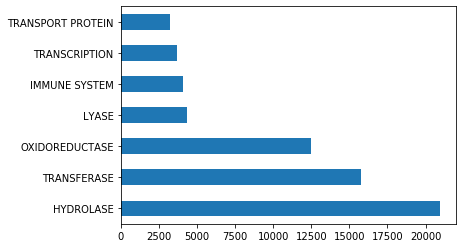

In [12]:
df2["classification"].value_counts().plot.barh()

# Bagimli degisken olarak gordugumuz Classification degiskeni ile gorsellestirmeye basliyoruz

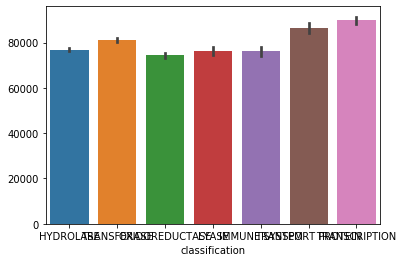

In [14]:
sns.barplot( x = "classification", y = df2.classification.index, data = df2 )

In [37]:
df2.groupby(["classification"])["structureMolecularWeight",].std()

# Bu group by isleminin amaci ise bir sonraki grafikte gorecegimiz barplot grafigindeki ince sapmalari belirten cubuklarin daha net anlasilmasi icindir.

,structureMolecularWeight
classification,
HYDROLASE,118766.258031
IMMUNE SYSTEM,81727.072432
LYASE,109327.830725
OXIDOREDUCTASE,114854.286304
TRANSCRIPTION,117301.014628
TRANSFERASE,126106.018760
TRANSPORT PROTEIN,179231.297183


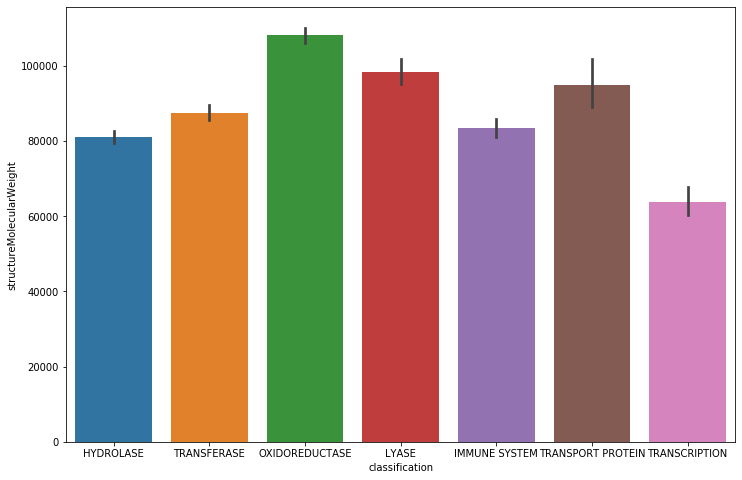

In [42]:
plt.figure(figsize=(12,8))
ax = sns.barplot( x = "classification", y = "structureMolecularWeight", data = df2 )

# Classification degiskenine ait siniflarin Molekul agirligina gore sirlamasini gorebiliyoruz
# Yani en fazla molekul agirlina sahip olan sinif OXIDOREDUCTASE olarak gozukmekte
# Bu dagilimda en fazla standart sapmaya sahip sinif ise TRANSPORT PROTEIN olarak gozlenmekte 

* **Bir group by islemi yaparak barplot yapmadan once siniflarin molekul tipine gore agirliklarinin ortalamasini gorelim**
* **Boylece gorseldeki dagilimin da matematiksel kismini net bir sekilde gormus olacagiz**

In [59]:
df2.groupby(["classification","macromoleculeType"])["structureMolecularWeight"].mean()

classification     macromoleculeType         
HYDROLASE          Protein                        80126.252599
                   Protein#DNA                   111428.578730
                   Protein#DNA#DNA/RNA Hybrid    190495.050000
                   Protein#DNA#RNA                99704.120000
                   Protein#DNA/RNA Hybrid         45054.870000
                   Protein#RNA                   145302.585172
IMMUNE SYSTEM      Protein                        82732.872664
                   Protein#DNA                   178597.520000
                   Protein#DNA#RNA               455830.860000
                   Protein#RNA                   143386.055000
LYASE              Protein                        98303.757004
                   Protein#DNA                    65712.410000
OXIDOREDUCTASE     Protein                       107325.907479
                   Protein#DNA                    45127.572222
                   Protein#RNA                   182938.060000
TRANSCRIP

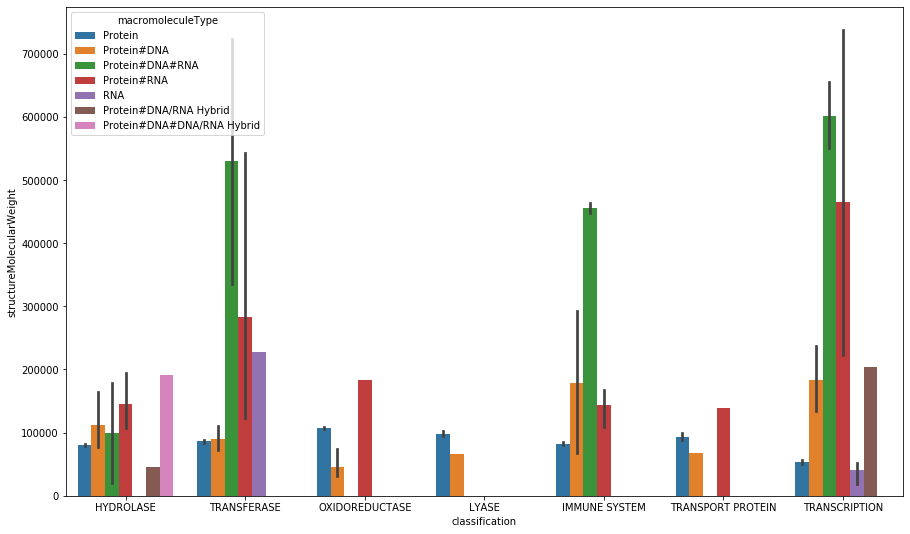

In [50]:
plt.figure(figsize=(15,9))
ax = sns.barplot( x = "classification", y = "structureMolecularWeight",hue="macromoleculeType", data = df2 )

# Bir onceki grafikten farkli olarak bu grafikte ele olay ikinci bir kirilimi eklemis olmak
# Protein siniflari X eksinin de iken Y eksenin de proteinlerin molekuler agirliklari var
# Ve ayni zaman da bu siniflarin kendi icerisinde dagilimlari var ve  bu proteinlerin molekul tiplerine gore gozlenmekte
# Simdi Yukari daki GROUP BY islemine baktimiz da aslinda bu dagilimlarin saglamasi da gozukmekte 

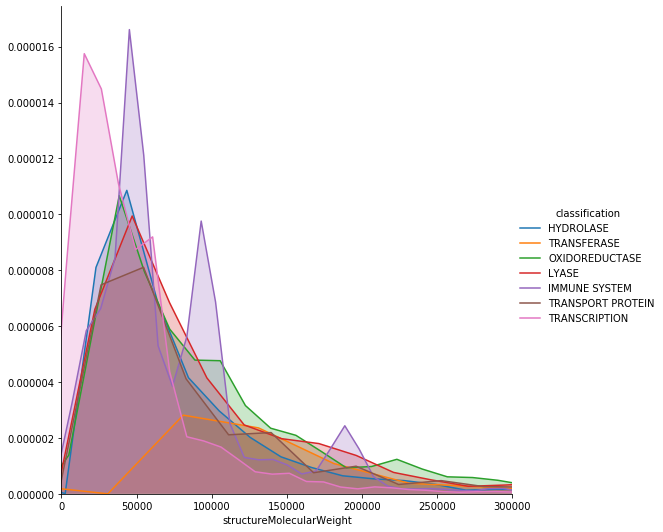

In [41]:
(sns
 .FacetGrid(df2,
            hue= "classification",
           height= 7.5,
           xlim= (0, 300000))
 .map(sns.kdeplot, "structureMolecularWeight",shade = True)
 .add_legend())

# Proteinlerin ait olduklari siniflara da molekul tipine gore frekanslarini gorebiliyoruz
# Molekul agirliginin siniflara gore frekanslarinin daha farkli oldugunu anlayabiliyoruz
# Ornegin sinif TRANSCRIPTION olan proteinlerin molekul agirliklari 0-5000 arasinda iken frekans yogunlugu tavan yapmis durumda
# Daha sonra 5000-10000 molekul agirliginda ise IMMUNE SYSTEM sinifina ait proteinler frekans sikligi olarak en fazla olan duruyor
# Bir yerden sonra molekul agirli artan bir trende burundugunde artik tum siniflarin her molekul agirliginda neredeyse ayni frekans
## yogunluguna sahip oldugunu gorebiliyoruz. 

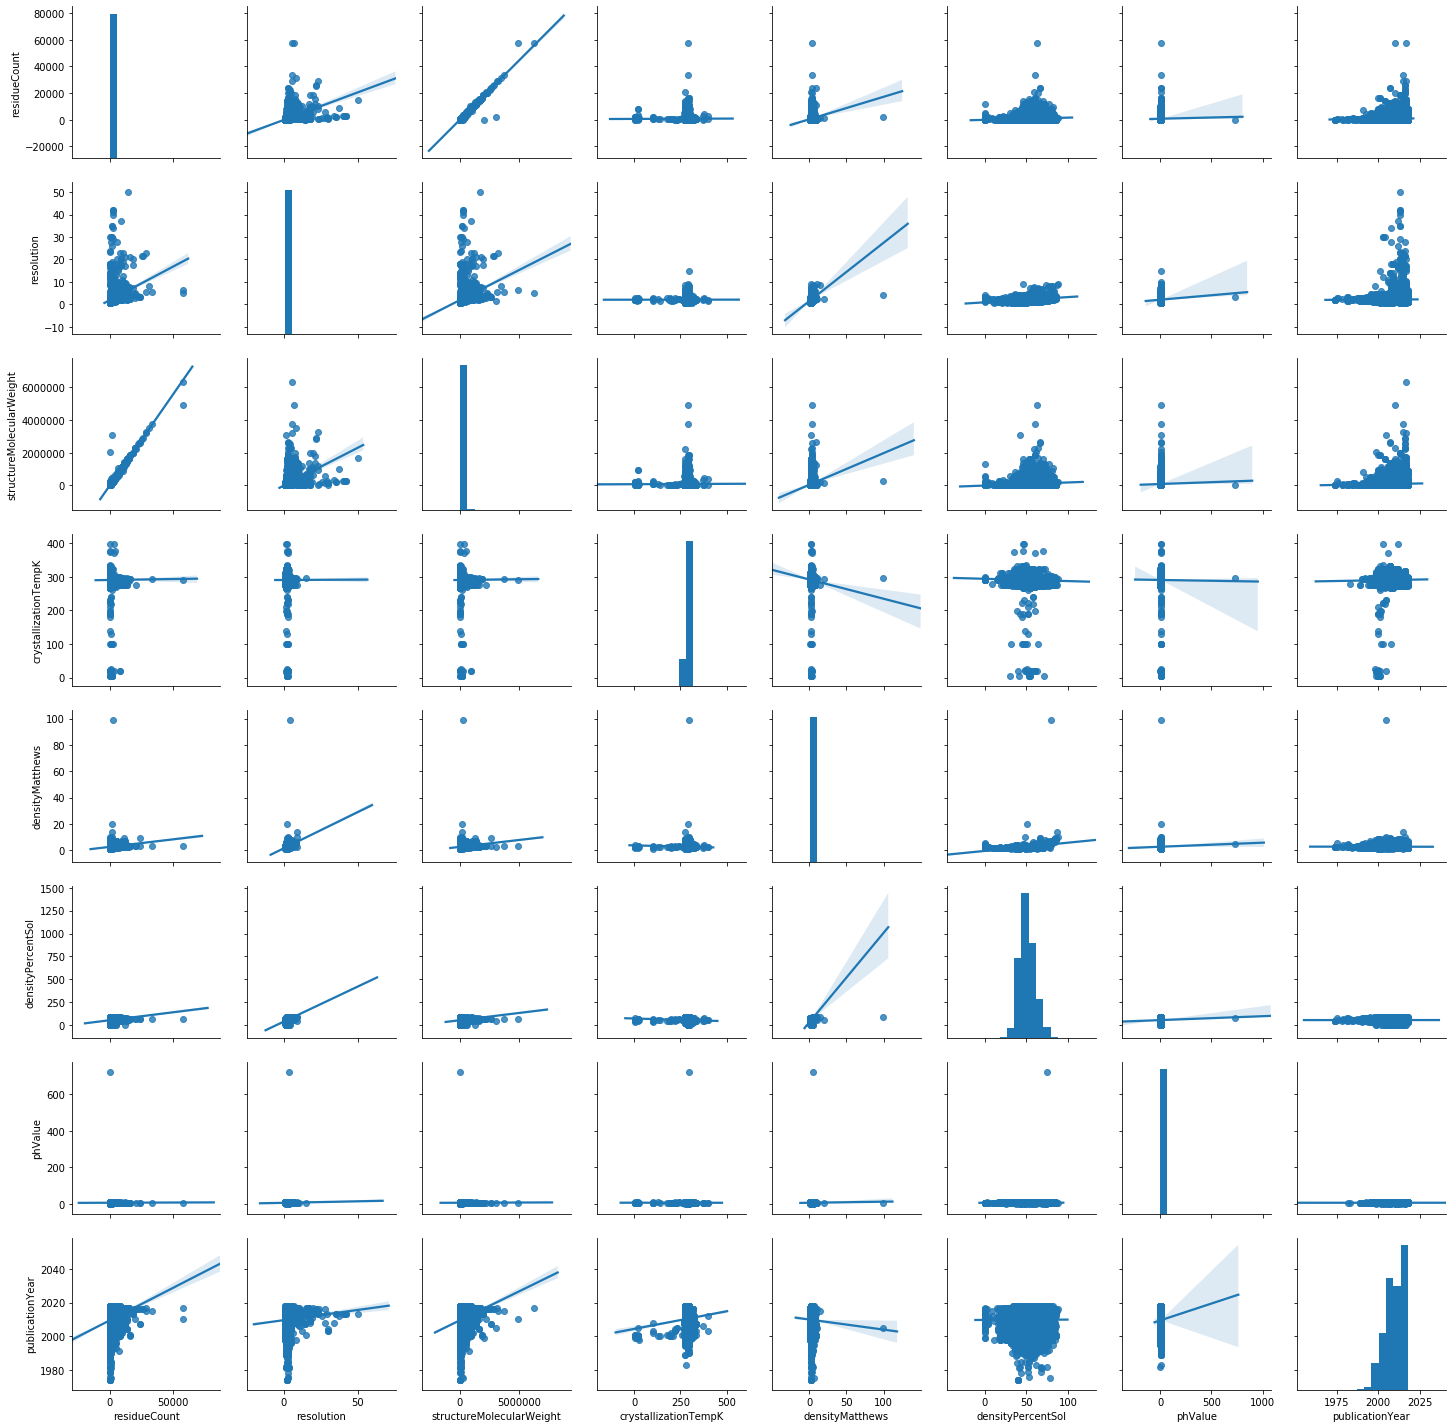

In [26]:
sns.pairplot(df2,kind="reg")

# Bu gorsel ile suna deginmis olduk Scatter Plot bilindigi uzere sacilim ve bize korelasyon hakkinda bilgi vermekte.
# Ayni zamanda degiskenlerin birbiri ile olan iliskisini de gostermek acisindan bir regresyon egrisi ciziyoruz. 
# Ortaya cikan grafikte cok fazla detay oldugu icin bu grafiksel sonuclarin birde istatistiksel kismini yani korelasyon kismini ele alip yorum yapalim.

In [27]:
df2.corr()

# Olayin istatistiksel kismina gecildiginde iki sonuc goze carpmakta 0.349965 ve 0.990821
# Iste bu iki sonuc residueCount - resolution arasinda pozitife yakin bir iliski oldugunu gostermekte.
# Kalintilar ile cozulme arasinda artan bir iliski gorulmekte ama fazla denemez

# Daha sonra structureMolecularWeight - residueCount arasinda yuksek pozitif yonlu bir iiski oldugu gozlenmekte
# Yani molekul agirligi artarken cozulme degeri de artmakta.  

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
residueCount,1.000000,0.349965,0.990821,0.005208,0.138504,0.168906,0.006683,0.078496
resolution,0.349965,1.000000,0.351025,0.001056,0.378522,0.422207,0.025548,0.021884
structureMolecularWeight,0.990821,0.351025,1.000000,0.004452,0.141905,0.172713,0.007273,0.078241
crystallizationTempK,0.005208,0.001056,0.004452,1.000000,-0.044993,-0.063627,-0.001751,0.042997
densityMatthews,0.138504,0.378522,0.141905,-0.044993,1.000000,0.783695,0.013506,-0.008492
densityPercentSol,0.168906,0.422207,0.172713,-0.063627,0.783695,1.000000,0.015317,0.003297
phValue,0.006683,0.025548,0.007273,-0.001751,0.013506,0.015317,1.000000,0.004717
publicationYear,0.078496,0.021884,0.078241,0.042997,-0.008492,0.003297,0.004717,1.000000


* **Iki adet sonucumuz vardi 0,99 ve 0,34 sirasiyla bunlari grafik uzerinde de inceleyelim** 

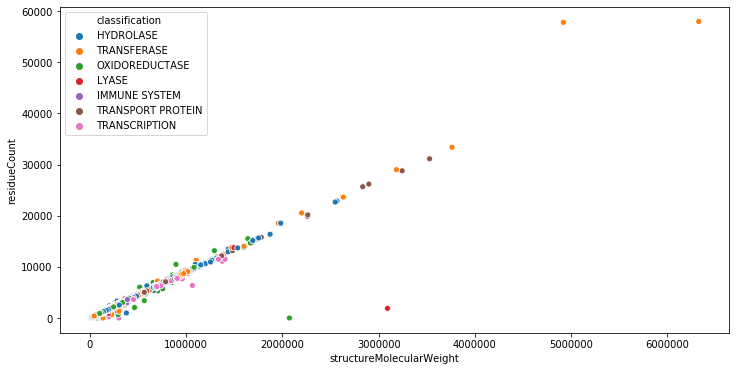

In [32]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x = "structureMolecularWeight", y = "residueCount" ,hue="classification",data=df2)

# Bu 0,99 iliskiye bakarken bir de fazladan bilgi almak adina HUE ile Classification yani siniflari da ekliyoruz.
# Molekul siniflarina gore molekul agirli ve kalinti(tortular) arasindaki iliskinin neye gore arttigi hakkinda biraz daha bilgi sahibi olmus olduk.

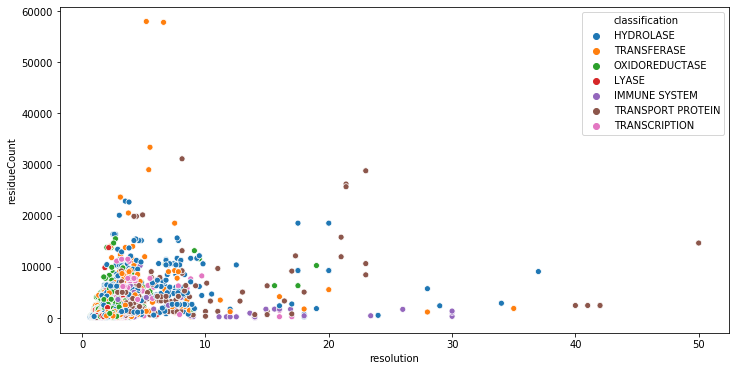

In [35]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x = "resolution", y = "residueCount" ,hue="classification",data=df2)

# Ikinci yuksek sayilabilecek 0,34 iliski incelendigin de ise bunlarin hangi siniflar bazli oldugu ve yayilimda yine hangilerinin etkili oldugunu anlayabiliriz.
# Genel olarak bir yere kadar iki degisken arasindaki iliski birlikte artarken ardindan bu trend durmus.
# Bunun arkasindaki detaylar ise biraz da is bilgisine dayanmaktadir. 


### 2.1) Missing Value Görselleştirme

In [7]:
df.isnull().sum()

structureId                     0
classification                  2
experimentalTechnique           0
macromoleculeType            3765
residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationMethod       45159
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
pdbxDetails                 22867
phValue                     36291
publicationYear             23799
dtype: int64

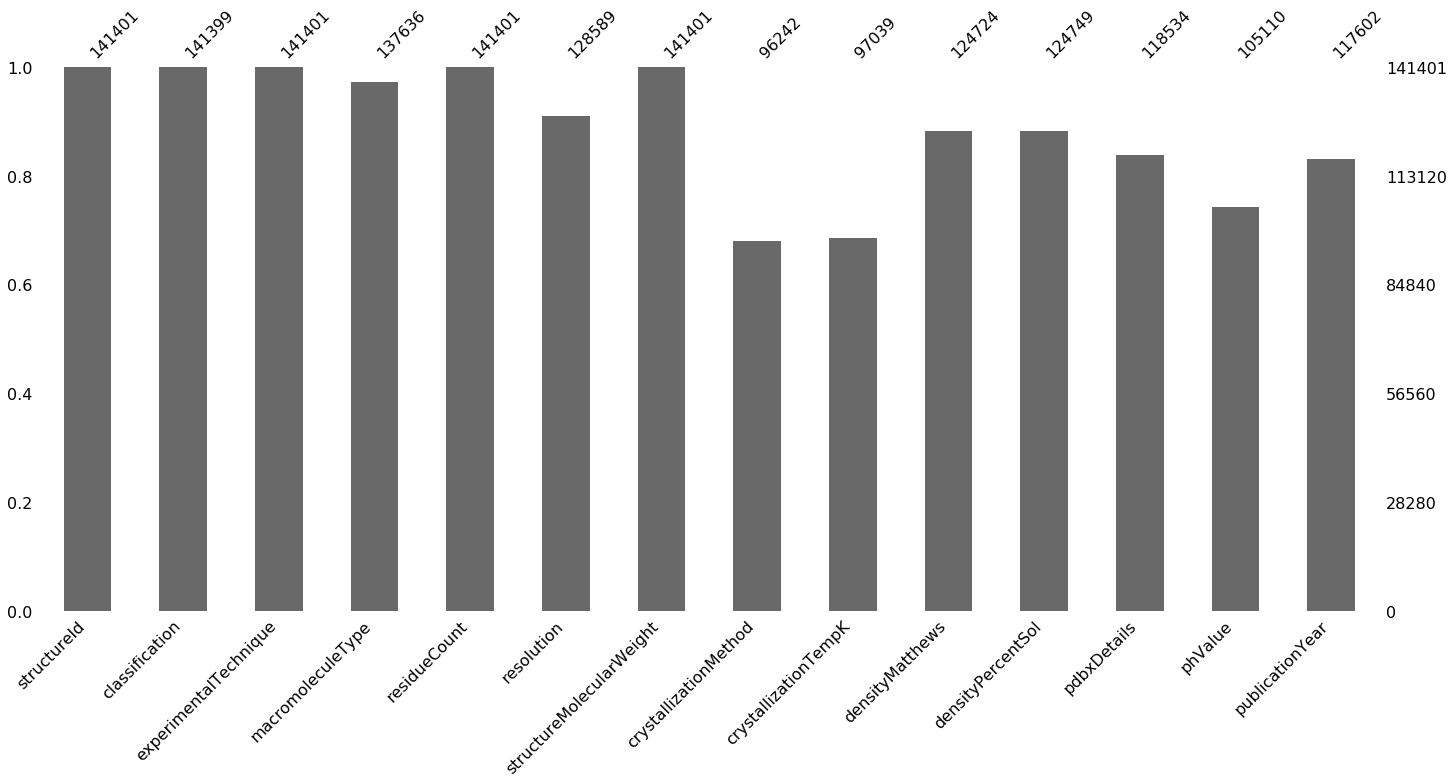

In [43]:
msno.bar(df) 
#Grafikteki barların yüksekliği total veriye oranla orada olan sayıyı veriyor. Örneğin structerId de boş değer yok diyebiliriz.

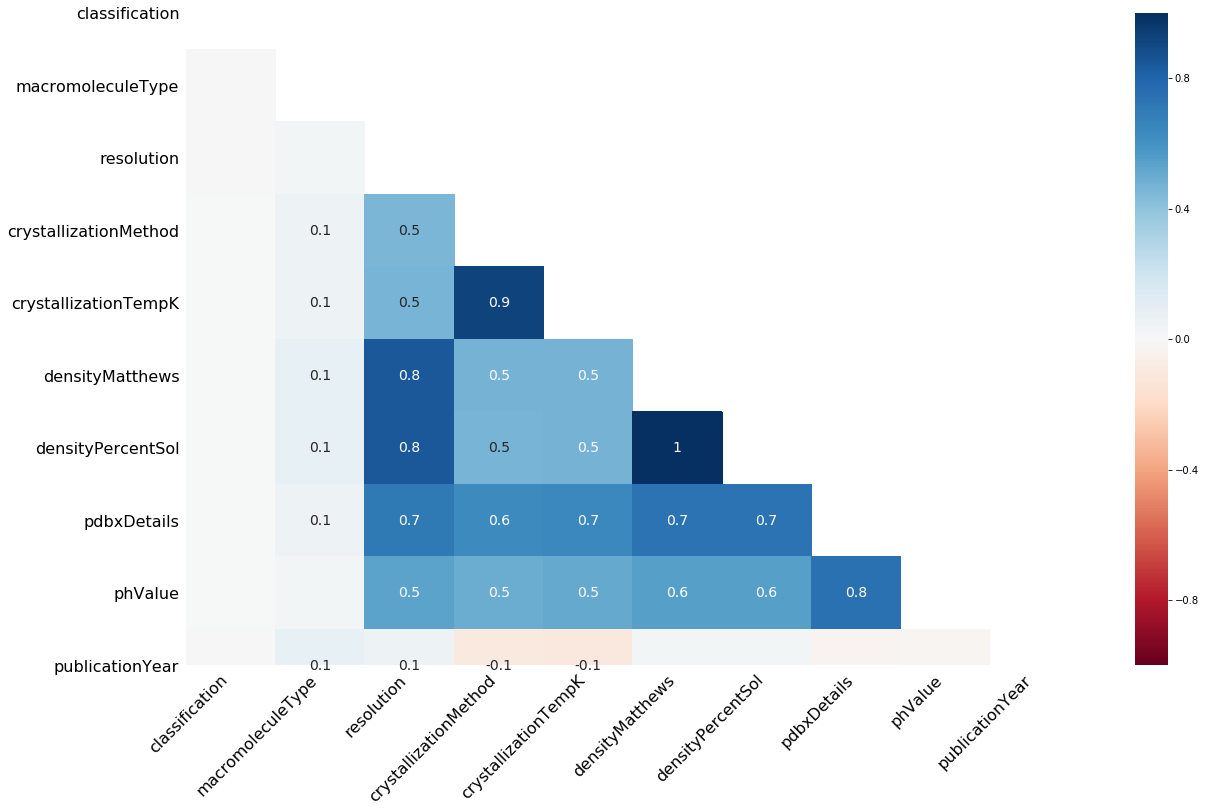

In [44]:
msno.heatmap(df) 

### 2.2) phValue Görselleştirmesi

In [56]:
baz = df1[df1["phValue"]  > 7 ]["phValue"]

In [55]:
notr = df1[df1["phValue"]  == 7 ]["phValue"]

In [54]:
asit = df1[df1["phValue"]  < 7 ]["phValue"]

In [59]:
sozluk = {"Asit": asit,
          "Notr": notr,
          "Baz": baz
         }

In [63]:
phtablo = pd.DataFrame(sozluk)

In [68]:
phtablo["Notr"].value_counts()

7.0    5742
Name: Notr, dtype: int64

In [72]:
phtablo.count()

Asit    25343
Notr     5742
Baz     21628
dtype: int64

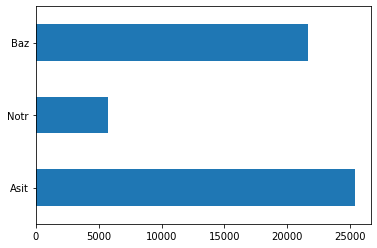

In [75]:
phtablo.count().plot.barh()

## 3) Aykırı Değer Temizleme(Outlier Cleaning)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
data = pd.read_csv("pdb_data_no_dups.csv")
data.head(2)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


In [4]:
y = data[["classification"]]
y

,classification
0,DNA-RNA HYBRID
1,DNA
2,OXYGEN TRANSPORT
3,DNA
4,HYDROLASE(O-GLYCOSYL)
...,...
141396,LYASE(CARBON-CARBON)
141397,T-RNA
141398,LECTIN (AGGLUTININ)
141399,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)


In [5]:
x = data.drop("classification", axis = 1)
x.head(2)

,structureId,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((113120, 13), (28281, 13), (113120, 1), (28281, 1))

In [8]:
columns = x_train.select_dtypes(["int64", "float64"])
columns

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
116178,258,1.45,29452.57,291.0,2.12,42.09,7.8,2015.0
27418,598,1.80,62670.17,289.0,2.40,48.00,4.5,2004.0
54783,488,2.80,55629.98,NaN,2.93,58.08,8.5,2010.0
106000,694,1.80,77979.53,291.0,2.48,50.46,8.0,2014.0
3082,259,2.20,29251.28,NaN,2.15,42.89,NaN,1995.0
...,...,...,...,...,...,...,...,...
110268,289,1.80,34202.32,293.0,2.26,45.57,6.0,2015.0
119879,804,3.01,93648.18,298.0,2.26,45.66,NaN,2016.0
103694,189,2.35,22153.37,289.0,2.76,55.46,7.5,NaN
131932,19955,4.97,3325585.75,NaN,NaN,NaN,NaN,2017.0


In [9]:
del columns["phValue"]
del columns["publicationYear"]
columns

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol
116178,258,1.45,29452.57,291.0,2.12,42.09
27418,598,1.80,62670.17,289.0,2.40,48.00
54783,488,2.80,55629.98,NaN,2.93,58.08
106000,694,1.80,77979.53,291.0,2.48,50.46
3082,259,2.20,29251.28,NaN,2.15,42.89
...,...,...,...,...,...,...
110268,289,1.80,34202.32,293.0,2.26,45.57
119879,804,3.01,93648.18,298.0,2.26,45.66
103694,189,2.35,22153.37,289.0,2.76,55.46
131932,19955,4.97,3325585.75,NaN,NaN,NaN


In [10]:
columns.columns

Index(['residueCount', 'resolution', 'structureMolecularWeight',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol'],
      dtype='object')

In [11]:
lower_and_upper = {}
x_train_copy = x_train.copy()
for col in columns.columns:
    q1 = x_train[col].describe()[4]
    q3 = x_train[col].describe()[6]
    iqr = q3 - q1
    lowerbound = q1 - (1.5*iqr)
    upperbound = q3 + (1.5*iqr)
    lower_and_upper[col] = (lowerbound, upperbound)
    x_train_copy.loc[(x_train_copy.loc[:,col] < lowerbound), col] = lowerbound * 0.75
    x_train_copy.loc[(x_train_copy.loc[:,col] > upperbound), col] = upperbound * 1.25

In [12]:
lower_and_upper

{'residueCount': (-665.0, 1711.0),
 'resolution': (0.7500000000000002, 3.55),
 'structureMolecularWeight': (-75687.66250000003, 195805.41750000004),
 'crystallizationTempK': (282.5, 302.5),
 'densityMatthews': (1.1850000000000003, 3.9450000000000003),
 'densityPercentSol': (24.389999999999993, 77.75)}

In [13]:
x_test_copy = x_test.copy()
for col in columns.columns:
    x_test_copy.loc[(x_test_copy.loc[:,col] < lower_and_upper[col][0]), col] = lower_and_upper[col][0] * 0.75
    x_test_copy.loc[(x_test_copy.loc[:,col] > lower_and_upper[col][1]), col] = lower_and_upper[col][1] * 1.25

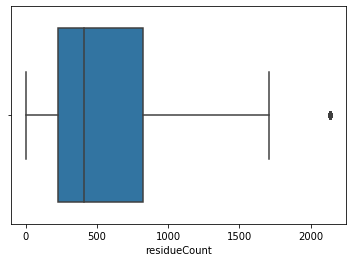

In [14]:
sns.boxplot(x_test_copy.residueCount)

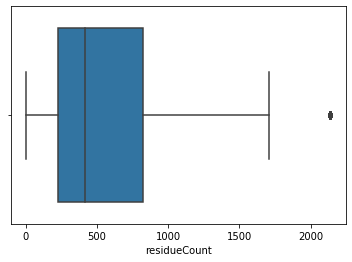

In [15]:
sns.boxplot(x_train_copy.residueCount)

### 3.1) Baskılama Yöntemi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv(r"pdb_data_no_dups.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
structureId                 141401 non-null object
classification              141399 non-null object
experimentalTechnique       141401 non-null object
macromoleculeType           137636 non-null object
residueCount                141401 non-null int64
resolution                  128589 non-null float64
structureMolecularWeight    141401 non-null float64
crystallizationMethod       96242 non-null object
crystallizationTempK        97039 non-null float64
densityMatthews             124724 non-null float64
densityPercentSol           124749 non-null float64
pdbxDetails                 118534 non-null object
phValue                     105110 non-null float64
publicationYear             117602 non-null float64
dtypes: float64(7), int64(1), object(6)
memory usage: 15.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
residueCount,141401.0,825.374849,2136.461080,0.00,226.00,414.00,820.00,313236.0
resolution,128589.0,2.263807,1.410878,0.48,1.80,2.10,2.50,70.0
structureMolecularWeight,141401.0,112079.000614,569015.201457,314.38,26128.56,47477.79,94084.84,97730536.0
crystallizationTempK,97039.0,290.967713,9.541080,4.00,290.00,293.00,295.00,398.0
densityMatthews,124724.0,2.670267,0.783740,0.00,2.21,2.49,2.91,99.0
densityPercentSol,124749.0,51.353163,10.104561,0.00,44.37,50.50,57.71,92.0
phValue,105110.0,6.788685,2.556819,0.00,6.00,7.00,7.50,724.0
publicationYear,117602.0,2008.922365,8.459286,201.00,2005.00,2010.00,2014.00,2018.0


* **Outlier temizlenecegi zaman kategorik degiskenler disarida birakilarak numeric degiskenler uzerinden gidip ona gore Upper ve Lower degerler belirlenir.**

* **Bu nokta da bagimli degisken olarak bildiklerimiz kadariyla ele alacagimiz degisken DensityMatthews yani yogunluk olacaktir. Protenin molekul yogunlugu. Bu su demek degildir kesin olarak bagimli degisken DensityMatthews'dir diyemeyiz malum veri setinin is bilgisine pek hakim degiliz. Biz bildiklerimiz kadariyla bir baglanti kurup bunun uzerinden bir cikarim yapiyoruz.**

In [5]:
dfnum = df.select_dtypes(include = ["int64", "float64"])
#dfnum = dfnum.dropna()

In [6]:
y = dfnum.densityMatthews
X = dfnum.drop('densityMatthews',axis=1)

In [7]:
y

0         1.78
1         2.00
2         3.09
3         2.28
4         2.75
          ... 
141396    2.38
141397    3.17
141398    2.50
141399    2.79
141400    3.96
Name: densityMatthews, Length: 141401, dtype: float64

In [8]:
X

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityPercentSol,phValue,publicationYear
0,20,1.90,6360.30,NaN,30.89,7.0,1994.0
1,24,2.25,7939.35,NaN,38.45,NaN,1995.0
2,154,2.07,18112.80,NaN,60.20,9.0,1999.0
3,24,2.20,7637.17,277.0,46.06,7.0,1995.0
4,165,1.74,18926.61,NaN,55.28,NaN,1993.0
...,...,...,...,...,...,...,...
141396,932,2.60,101838.68,NaN,48.29,NaN,1991.0
141397,0,NaN,24244.34,NaN,61.18,NaN,1986.0
141398,342,1.80,34270.22,NaN,50.76,NaN,1990.0
141399,388,1.90,43542.29,NaN,55.93,NaN,1989.0


* **Bu kisimda Train icin veri setinin %80 degerini Test icin ise %20 degerini parcaladik.**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 123)

* **Train deki birkac degiskeni gorsellestirelim boxplot ile**

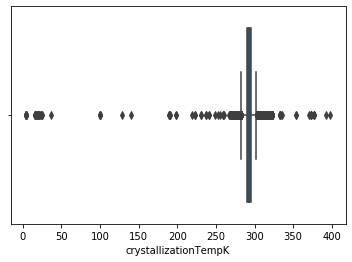

In [10]:
sns.boxplot(x = "crystallizationTempK",data = X_train)


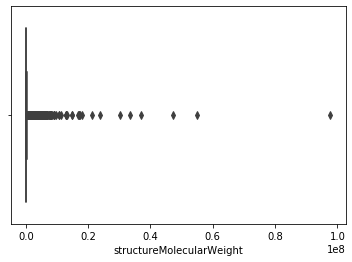

In [11]:
sns.boxplot(x ="structureMolecularWeight",data = X_train)

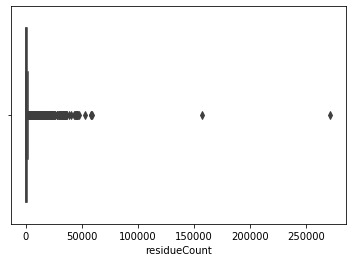

In [12]:
sns.boxplot(x ="residueCount",data = X_train)

* **Simdi sirada en sik kullanilan yontemlerden biri olan Quantiller a gore alt ve ust sinir belirleyecegiz**

In [13]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1 

In [14]:
Q1

residueCount                  226.000
resolution                      1.800
structureMolecularWeight    26108.035
crystallizationTempK          290.000
densityPercentSol              44.390
phValue                         6.000
publicationYear              2005.000
Name: 0.25, dtype: float64

In [15]:
Q3

residueCount                  821.000
resolution                      2.500
structureMolecularWeight    94097.155
crystallizationTempK          295.000
densityPercentSol              57.700
phValue                         7.500
publicationYear              2014.000
Name: 0.75, dtype: float64

In [16]:
IQR

residueCount                  595.00
resolution                      0.70
structureMolecularWeight    67989.12
crystallizationTempK            5.00
densityPercentSol              13.31
phValue                         1.50
publicationYear                 9.00
dtype: float64

In [17]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR


* **Belirledigimiz alt ve ust sinirlara gore outlier degerlerini bulup onlari farkli metodlar ile isleyecegiz.**

In [18]:
alt_sinir

residueCount                 -666.500
resolution                      0.750
structureMolecularWeight   -75875.645
crystallizationTempK          282.500
densityPercentSol              24.425
phValue                         3.750
publicationYear              1991.500
dtype: float64

In [19]:
ust_sinir

residueCount                  1713.500
resolution                       3.550
structureMolecularWeight    196080.835
crystallizationTempK           302.500
densityPercentSol               77.665
phValue                          9.750
publicationYear               2027.500
dtype: float64

* **Toplu sekilde aykiri deger doldurma ve degisken degisken aykiri deger doldurma yontemleri vardir. Biz bu adimda degiskenleri tek tek ele alip aykiri degerleri dolduracagiz.**

In [20]:
residueCount = X_train["residueCount"]

In [21]:
(residueCount < alt_sinir.residueCount) | (residueCount > ust_sinir.residueCount)

127859    False
53676     False
69506     False
101161    False
42528     False
          ...  
129130    False
119906     True
17730     False
28030     False
15725     False
Name: residueCount, Length: 113120, dtype: bool

In [22]:
RCount_upper = (residueCount > ust_sinir.residueCount)

In [23]:
RCount_lower = (residueCount < alt_sinir.residueCount)

* **Alt ust sinirlari belirledik simdi baskilama yontemi(alt sinir altini alt sinira esitle, ust sinirin ustunu de ust sinira esitle) ile bu aykiri degerleri dolduralim.** 

In [24]:
# Ust siniri dolduruyoruz

X_train["residueCount"][RCount_upper] = ust_sinir.residueCount
X_train["residueCount"][RCount_upper]

# Yeni "residueCount" degiskenimiz de ust sinirdaki tum degerleri doldurduk 

117981    1713.5
39054     1713.5
68829     1713.5
113290    1713.5
138535    1713.5
           ...  
9705      1713.5
64025     1713.5
120775    1713.5
53659     1713.5
119906    1713.5
Name: residueCount, Length: 9654, dtype: float64

In [25]:
# Ayni sekilde ust siniri da baskilama yontemi ile dolduruyoruz

X_train["residueCount"][RCount_lower] = alt_sinir.residueCount
X_train["residueCount"][RCount_lower]

# Alt sinirin altinda deger olmadigi icin bos bir seri goruyoruz 

Series([], Name: residueCount, dtype: float64)

* **3 Adet degisken gorsellestirmistik oncesinde sirasiyla hepsinin outlier degerlerini temizleyip tekrardan ortaya cikan gorsellere bakalim.**

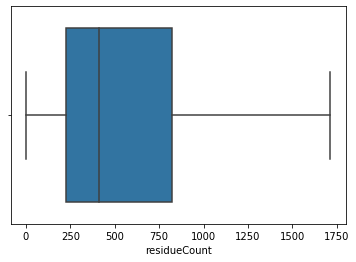

In [26]:
sns.boxplot(x ="residueCount",data = X_train)

In [27]:
# Bir diger degiskene geciyoruz "crystallizationTempK"

crystallizationKelvin = X_train["crystallizationTempK"]

In [28]:
(crystallizationKelvin < alt_sinir.crystallizationTempK) | (crystallizationKelvin > ust_sinir.crystallizationTempK)

127859    False
53676     False
69506     False
101161    False
42528     False
          ...  
129130    False
119906    False
17730     False
28030     False
15725     False
Name: crystallizationTempK, Length: 113120, dtype: bool

In [29]:
upper = (crystallizationKelvin > ust_sinir.crystallizationTempK)
lower = (crystallizationKelvin < alt_sinir.crystallizationTempK)

In [30]:
X_train["crystallizationTempK"][upper] = ust_sinir.crystallizationTempK
X_train["crystallizationTempK"][upper]

104381    302.5
127398    302.5
83789     302.5
94533     302.5
96153     302.5
          ...  
127950    302.5
38096     302.5
97813     302.5
22966     302.5
18912     302.5
Name: crystallizationTempK, Length: 531, dtype: float64

In [31]:
X_train["crystallizationTempK"][lower] = alt_sinir.crystallizationTempK
X_train["crystallizationTempK"][lower]

18236     282.5
23215     282.5
119067    282.5
3962      282.5
114627    282.5
          ...  
140682    282.5
66978     282.5
20355     282.5
30255     282.5
118857    282.5
Name: crystallizationTempK, Length: 12843, dtype: float64

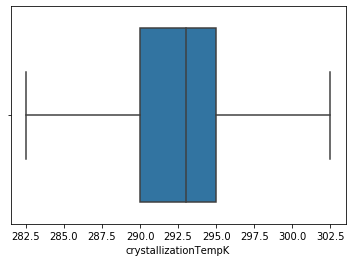

In [32]:
sns.boxplot(x = "crystallizationTempK",data = X_train)

*  **Son olarak da diger degiskene geciyoruz MolekulAgirligi**

In [33]:
MolekularWeight = X_train["structureMolecularWeight"]
MolekularWeight

127859     48371.56
53676      95906.59
69506      21152.80
101161    115361.30
42528      15956.92
            ...    
129130     55486.14
119906    198939.28
17730     129524.31
28030       9274.51
15725      67795.38
Name: structureMolecularWeight, Length: 113120, dtype: float64

In [34]:
(MolekularWeight < alt_sinir.structureMolecularWeight) | (MolekularWeight > ust_sinir.structureMolecularWeight)

127859    False
53676     False
69506     False
101161    False
42528     False
          ...  
129130    False
119906     True
17730     False
28030     False
15725     False
Name: structureMolecularWeight, Length: 113120, dtype: bool

In [35]:
upper = (MolekularWeight > ust_sinir.structureMolecularWeight)
lower = (MolekularWeight < alt_sinir.structureMolecularWeight)

In [36]:
X_train["structureMolecularWeight"][upper] = ust_sinir.structureMolecularWeight
X_train["structureMolecularWeight"][upper]

117981    196080.835
39054     196080.835
68829     196080.835
113290    196080.835
138535    196080.835
             ...    
9705      196080.835
64025     196080.835
120775    196080.835
53659     196080.835
119906    196080.835
Name: structureMolecularWeight, Length: 9821, dtype: float64

In [37]:
X_train["structureMolecularWeight"][upper] = alt_sinir.structureMolecularWeight
X_train["structureMolecularWeight"][upper]

117981   -75875.645
39054    -75875.645
68829    -75875.645
113290   -75875.645
138535   -75875.645
            ...    
9705     -75875.645
64025    -75875.645
120775   -75875.645
53659    -75875.645
119906   -75875.645
Name: structureMolecularWeight, Length: 9821, dtype: float64

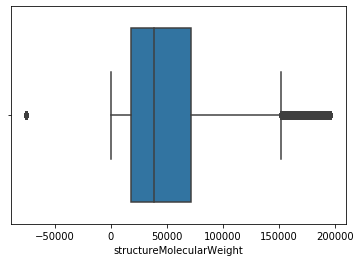

In [38]:
sns.boxplot(x = "structureMolecularWeight",data = X_train)

* **Ayni Alt ve Ust sinirlari Y_train kisminda da birkac degisken icin kullaniyoruz**

In [39]:
alt_sinir

residueCount                 -666.500
resolution                      0.750
structureMolecularWeight   -75875.645
crystallizationTempK          282.500
densityPercentSol              24.425
phValue                         3.750
publicationYear              1991.500
dtype: float64

In [40]:
ust_sinir

residueCount                  1713.500
resolution                       3.550
structureMolecularWeight    196080.835
crystallizationTempK           302.500
densityPercentSol               77.665
phValue                          9.750
publicationYear               2027.500
dtype: float64

In [41]:
# Test kismindaki degsikenler icinde TRAIN de gecerli olan ALT ve UST sinir degerlerini kullanarak 3 adet degiskenin OUTLIER degerlerini dolduralim

X_test

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityPercentSol,phValue,publicationYear
45146,38,NaN,12129.84,NaN,NaN,NaN,2012.0
73091,456,1.60,50517.79,293.00,42.50,8.50,2010.0
112116,310,1.71,36436.02,NaN,49.66,NaN,2014.0
130290,408,2.10,44881.47,295.15,56.09,4.25,2016.0
125403,822,2.15,95342.28,293.00,74.62,5.00,2016.0
...,...,...,...,...,...,...,...
120846,308,1.70,34493.99,293.00,43.00,8.00,2016.0
125235,952,2.74,108210.75,277.00,69.80,5.50,2017.0
134454,364,1.19,43130.77,298.00,46.72,7.00,2017.0
66821,1196,2.40,132205.59,296.00,55.44,8.50,2009.0


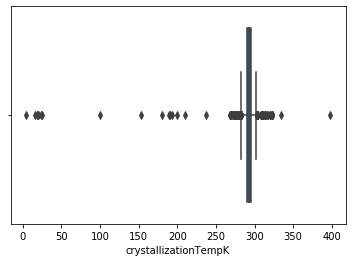

In [42]:
sns.boxplot(x = "crystallizationTempK",data = X_test)

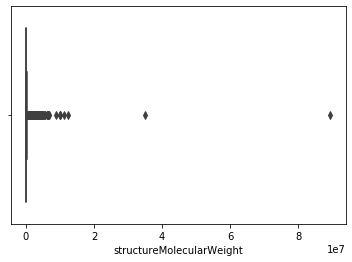

In [43]:
sns.boxplot(x = "structureMolecularWeight",data = X_test)

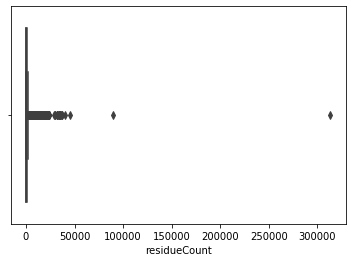

In [44]:
sns.boxplot(x = "residueCount",data = X_test)

In [45]:
crystallizationKelvin = X_test["crystallizationTempK"]

In [46]:
(crystallizationKelvin < alt_sinir.crystallizationTempK) | (crystallizationKelvin > ust_sinir.crystallizationTempK)

45146     False
73091     False
112116    False
130290    False
125403    False
          ...  
120846    False
125235     True
134454    False
66821     False
13538     False
Name: crystallizationTempK, Length: 28281, dtype: bool

In [47]:
upper = (crystallizationKelvin > ust_sinir.crystallizationTempK)
lower = (crystallizationKelvin < alt_sinir.crystallizationTempK)

In [48]:
X_test["crystallizationTempK"][upper] = ust_sinir.crystallizationTempK
X_test["crystallizationTempK"][upper]

95019     302.5
21473     302.5
126680    302.5
98022     302.5
61907     302.5
          ...  
126265    302.5
19806     302.5
67821     302.5
37444     302.5
28577     302.5
Name: crystallizationTempK, Length: 106, dtype: float64

In [49]:
X_test["crystallizationTempK"][lower] = alt_sinir.crystallizationTempK
X_test["crystallizationTempK"][lower]

70139     282.5
72259     282.5
138280    282.5
39214     282.5
66377     282.5
          ...  
39975     282.5
77475     282.5
75355     282.5
134813    282.5
125235    282.5
Name: crystallizationTempK, Length: 3178, dtype: float64

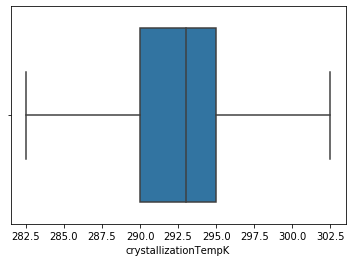

In [50]:
sns.boxplot(x = "crystallizationTempK",data = X_test)


* **Ilk degisken bitti simdi sirayla diger Test setindeki 2 degiskene de Traindaki alt ve ust sinirlari uygulayarak devam ediyoruz.**

In [51]:
MolekulAgirligi = X_test["structureMolecularWeight"]

In [52]:
(MolekulAgirligi < alt_sinir.structureMolecularWeight) | (MolekulAgirligi > ust_sinir.structureMolecularWeight)

45146     False
73091     False
112116    False
130290    False
125403    False
          ...  
120846    False
125235    False
134454    False
66821     False
13538     False
Name: structureMolecularWeight, Length: 28281, dtype: bool

In [53]:
upper = (MolekulAgirligi > ust_sinir.structureMolecularWeight)
lower = (MolekulAgirligi < alt_sinir.structureMolecularWeight)

In [54]:
X_test["structureMolecularWeight"][upper] = ust_sinir.structureMolecularWeight
X_test["structureMolecularWeight"][upper]

112609    196080.835
101207    196080.835
25328     196080.835
121957    196080.835
39214     196080.835
             ...    
125322    196080.835
62456     196080.835
112201    196080.835
75243     196080.835
103681    196080.835
Name: structureMolecularWeight, Length: 2428, dtype: float64

In [55]:
X_test["structureMolecularWeight"][upper] = alt_sinir.structureMolecularWeight
X_test["structureMolecularWeight"][upper]

112609   -75875.645
101207   -75875.645
25328    -75875.645
121957   -75875.645
39214    -75875.645
            ...    
125322   -75875.645
62456    -75875.645
112201   -75875.645
75243    -75875.645
103681   -75875.645
Name: structureMolecularWeight, Length: 2428, dtype: float64

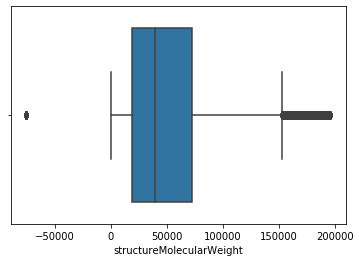

In [56]:
sns.boxplot(x = "structureMolecularWeight",data = X_test)

In [57]:
residueCount = X_test["residueCount"]

In [58]:
(residueCount < alt_sinir.residueCount) | (residueCount > ust_sinir.residueCount)

45146     False
73091     False
112116    False
130290    False
125403    False
          ...  
120846    False
125235    False
134454    False
66821     False
13538     False
Name: residueCount, Length: 28281, dtype: bool

In [59]:
upper = (residueCount > ust_sinir.residueCount)
lower = (residueCount < alt_sinir.residueCount)

In [60]:
X_test["residueCount"][upper] = ust_sinir.residueCount
X_test["residueCount"][upper]

112609    1713.5
101207    1713.5
25328     1713.5
121957    1713.5
39214     1713.5
           ...  
19656     1713.5
62456     1713.5
112201    1713.5
75243     1713.5
103681    1713.5
Name: residueCount, Length: 2377, dtype: float64

In [61]:
X_test["residueCount"][lower] = alt_sinir.residueCount
X_test["residueCount"][lower]

Series([], Name: residueCount, dtype: float64)

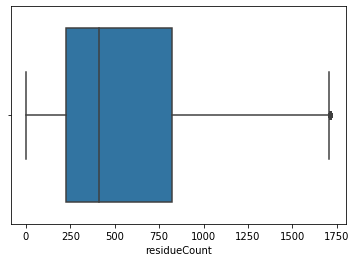

In [62]:
sns.boxplot(x = "residueCount",data = X_test)

## 4) Eksik Veri Doldurma

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv("pdb_data_no_dups.csv")
data.head(2)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


* Sayısal değişkenleri seçtik. phValue ve publicationYear kolonlarını kaldırdık.

In [3]:
df = data.select_dtypes(["int64", "float64"])

In [4]:
df.drop(columns=['publicationYear', 'phValue'], inplace = True)

* Bir satırda, 6 kolonda 3ten fazla bos deger var ise o satırı sildik. O verileri doldursakda bizim veri setimize uygun şekilde dolduramayız diye düşündüm

In [5]:
df.isnull().sum()

residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
dtype: int64

In [6]:
(df.isnull().sum(axis = 1) > 3).sum()

12558

In [7]:
df.loc[df.isnull().sum(axis = 1) > 3]

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol
6,24,NaN,7502.93,NaN,NaN,NaN
9,24,NaN,7454.78,NaN,NaN,NaN
12,12,NaN,3350.40,NaN,NaN,NaN
14,12,NaN,3086.58,NaN,NaN,NaN
16,14,NaN,4744.35,NaN,NaN,NaN
...,...,...,...,...,...,...
141273,16,NaN,4969.18,NaN,NaN,NaN
141322,16,NaN,5081.64,NaN,NaN,NaN
141327,0,NaN,266903.34,NaN,NaN,NaN
141330,21,NaN,2441.98,NaN,NaN,NaN


In [8]:
df = df.loc[df.isnull().sum(axis = 1) <= 3]

In [9]:
df

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol
0,20,1.90,6360.30,NaN,1.78,30.89
1,24,2.25,7939.35,NaN,2.00,38.45
2,154,2.07,18112.80,NaN,3.09,60.20
3,24,2.20,7637.17,277.0,2.28,46.06
4,165,1.74,18926.61,NaN,2.75,55.28
...,...,...,...,...,...,...
141396,932,2.60,101838.68,NaN,2.38,48.29
141397,0,NaN,24244.34,NaN,3.17,61.18
141398,342,1.80,34270.22,NaN,2.50,50.76
141399,388,1.90,43542.29,NaN,2.79,55.93


In [10]:
df.isnull().sum()

residueCount                    0
resolution                    254
structureMolecularWeight        0
crystallizationTempK        31804
densityMatthews              4119
densityPercentSol            4094
dtype: int64

### resolution

In [11]:
df["resolution"].isnull().sum()

254

In [12]:
df["resolution"].describe()

count    128589.000000
mean          2.263807
std           1.410878
min           0.480000
25%           1.800000
50%           2.100000
75%           2.500000
max          70.000000
Name: resolution, dtype: float64

In [13]:
df['resolution'].fillna(df.resolution.mean(), inplace = True)

In [14]:
df["resolution"].isnull().sum()

0

In [15]:
df["resolution"].describe()

count    128843.000000
mean          2.263807
std           1.409487
min           0.480000
25%           1.800000
50%           2.100000
75%           2.500000
max          70.000000
Name: resolution, dtype: float64

### crystallizationTempK

In [16]:
df["crystallizationTempK"].isnull().sum()

31804

In [17]:
df["crystallizationTempK"].describe()

count    97039.000000
mean       290.967713
std          9.541080
min          4.000000
25%        290.000000
50%        293.000000
75%        295.000000
max        398.000000
Name: crystallizationTempK, dtype: float64

In [18]:
df['crystallizationTempK'].fillna(df.crystallizationTempK.mean(), inplace = True)

In [19]:
df["crystallizationTempK"].isnull().sum()

0

In [20]:
df["crystallizationTempK"].describe()

count    128843.000000
mean        290.967713
std           8.280179
min           4.000000
25%         290.967713
50%         291.000000
75%         293.150000
max         398.000000
Name: crystallizationTempK, dtype: float64

### densityMatthews

In [21]:
df["densityMatthews"].isnull().sum()

4119

In [22]:
df["densityMatthews"].describe()

count    124724.000000
mean          2.670267
std           0.783740
min           0.000000
25%           2.210000
50%           2.490000
75%           2.910000
max          99.000000
Name: densityMatthews, dtype: float64

In [23]:
df['densityMatthews'].fillna(df.densityMatthews.mean(), inplace = True)

In [24]:
df["densityMatthews"].isnull().sum()

0

In [25]:
df["densityMatthews"].describe()

count    128843.000000
mean          2.670267
std           0.771110
min           0.000000
25%           2.220000
50%           2.510000
75%           2.890000
max          99.000000
Name: densityMatthews, dtype: float64

### densityPercentSol

In [26]:
df["densityPercentSol"].isnull().sum()

4094

In [27]:
df["densityPercentSol"].describe()

count    124749.000000
mean         51.353163
std          10.104561
min           0.000000
25%          44.370000
50%          50.500000
75%          57.710000
max          92.000000
Name: densityPercentSol, dtype: float64

In [28]:
df['densityPercentSol'].fillna(df.densityPercentSol.mean(), inplace = True)

In [29]:
df["densityPercentSol"].isnull().sum()

0

In [30]:
df["densityPercentSol"].describe()

count    128843.000000
mean         51.353163
std           9.942727
min           0.000000
25%          44.610000
50%          50.940000
75%          57.390000
max          92.000000
Name: densityPercentSol, dtype: float64

* **Tüm Eksikler giderilmiş oldu**

In [31]:
df.isnull().sum()

residueCount                0
resolution                  0
structureMolecularWeight    0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
dtype: int64

In [32]:
df

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol
0,20,1.900000,6360.30,290.967713,1.78,30.89
1,24,2.250000,7939.35,290.967713,2.00,38.45
2,154,2.070000,18112.80,290.967713,3.09,60.20
3,24,2.200000,7637.17,277.000000,2.28,46.06
4,165,1.740000,18926.61,290.967713,2.75,55.28
...,...,...,...,...,...,...
141396,932,2.600000,101838.68,290.967713,2.38,48.29
141397,0,2.263807,24244.34,290.967713,3.17,61.18
141398,342,1.800000,34270.22,290.967713,2.50,50.76
141399,388,1.900000,43542.29,290.967713,2.79,55.93
